# Nombres pseudo-aléatoires

Le but de cette série est de réaliser un programme qui génère des nombres aléatoires selon plusieurs distributions différentes au choix de l'utilisateur, puis d'étudier les propriétés statistiques des valeurs obtenues.

## Spécifications du programme

Notre générateur de nombres aléatoires utilise l'algorithme [mersenne twister](https://en.cppreference.com/w/cpp/numeric/random) pour générer des entiers aléatoires, qui sont ensuite transformés selon la [distribution](https://en.cppreference.com/w/cpp/numeric/random#Random_number_distributions) souhaitée, à savoir l'une des possibilités suivantes:

 * Normale de moyenne $\mu$ et deviation standard $\sigma$
 * Uniforme (réelle) sur l'intervalle $(a,b)$
 * Poisson de moyenne $\mu$

Pour simplifier les options du programme, toutes les distributions sont paramétrées par la moyenne $\mu$ et la déviation standard $\sigma$.
Dans le cas de la distribution uniforme, le programme doit donc calculer le minimum et maximum de la distribution en fonction de $\mu, \sigma$, dans le cas de la distribution de Poisson, $\sigma$ est ignoré (car déterminé par la moyenne).

## Options en ligne de commande

Les options du programme sont passées en ligne de commande et traitées à l'aide de la librairie [Boost](https://www.boost.org/doc/libs/1_86_0/doc/html/program_options/tutorial.html). Les options nécessaires sont $N$ (taille de l'échantillon), $\mu$ (moyenne), $\sigma$ (déviation standard) et nom du ficchier de sortie, ainsi que l'une des trois distributions au choix. On peut ajouter pour la reproductibilité des tests, la "seed".

Le message de description ("help") du programme pourrait donc être:
````
$ RNG -h
Random Number Generator:
  -h [ --help ]                     Show help message
  -s [ --seed ] arg (=0)            Random seed
  -n [ --size ] arg (=1)            Size of output
  -m [ --mean ] arg (=0)            Mean of distribution
  -d [ --sdev ] arg (=1)            Standard deviation of distribution
  -o [ --output ] arg (=output.txt) Output file
  --uniform                         Uniform distribution
  --normal                          Normal distribution
  --poisson                         Poisson distribution3
````
et le programme est executé par example ainsi:
````
./RNG --norm -m 5.5 -d 3.5 -n 10000 -o output_norm.txt
````

## Propriétés statistiques

### Distributions

Lire les fichiers de résultats et dessiner les histogrammes correpondants avec [pyplot.hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html). Calculer la moyenne et la déviation standard des échantillons et comparer avec les valeurs choisies à l'exécution du programme.
 
### Test d'autocorrélation

Choisir une des distributions, par exemple la distribution normale, et afficher l'autocorrélation des données à l'aide de [numpy.correlate](https://numpy.org/doc/stable/reference/generated/numpy.correlate.html). Il faut soustraire la moyenne $\bar x$ de l'échantillon $\{x_1,\dots,x_N\}$ puis diviser par la correlation en $k=0$:
\begin{align*}
A(k)&=\sum_{n=1}^{N-k}(x_n-\bar x)\cdot(x_{n+k}-\bar x)~.\\
\mathrm{ACF}(k)&=\frac{A(k)}{A(0)}
\end{align*}

Faire la même chose avec un échantillon d'une fonction déterministe
$$
\Bigl\{\cos(n)\cdot\cos(\sqrt{2}n-1)~:~n=0,...,N-1\Bigr\}~.
$$




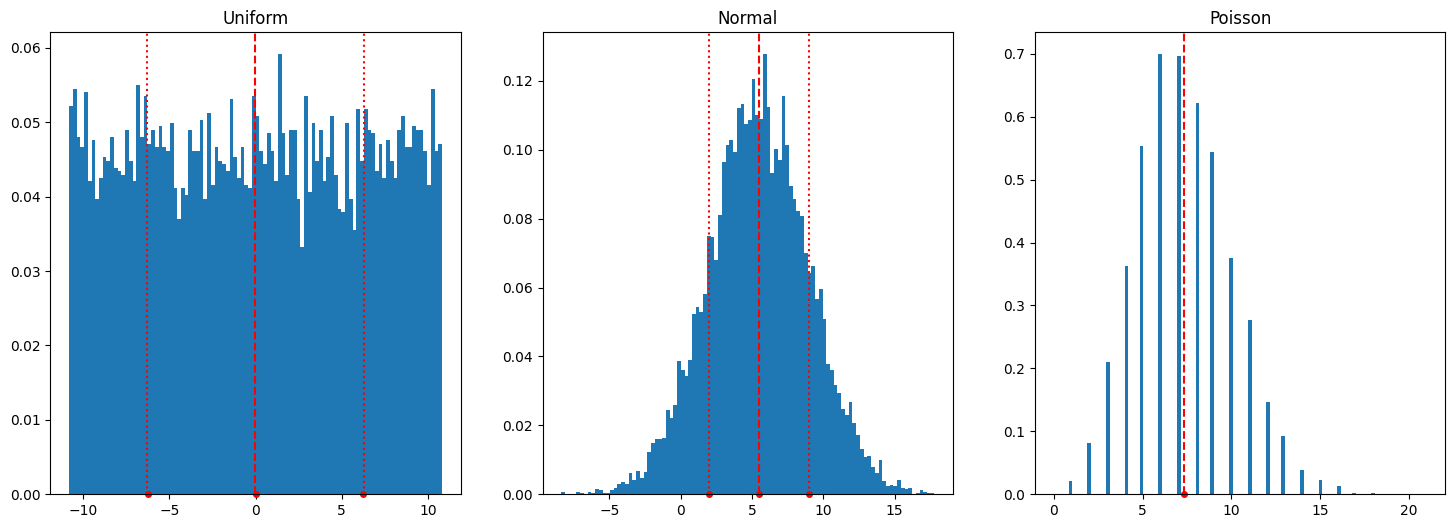

In [1]:
import numpy as np
import matplotlib.pyplot as plt

rpois = np.loadtxt("output_poisson.txt")
rnorm = np.loadtxt("output_normal.txt")
runif = np.loadtxt("output_uniform.txt")

nbins = 100

fig, ax = plt.subplots(1,3,figsize=(18,6))

mu = np.mean(runif)
si = np.std(runif)
pars = [0, 6.25]
ax[0].set_title("Uniform")
ax[0].hist(runif, bins=nbins, density=True)
ax[0].axvline(x=mu, color='red', linestyle='--')
ax[0].axvline(x=mu+si, color='red', linestyle=':')
ax[0].axvline(x=mu-si, color='red', linestyle=':')
pp = ax[0].plot(pars[0]+np.array([-1,0,1])*pars[1], [0,0,0], 'ro', markersize=4)
pp[0].set_clip_on(False)

mu = np.mean(rnorm)
si = np.std(rnorm)
pars = [5.5, 3.5]
ax[1].set_title("Normal")
ax[1].hist(rnorm, bins=nbins, density=True)
ax[1].axvline(x=mu, color='red', linestyle='--')
ax[1].axvline(x=mu+si, color='red', linestyle=':')
ax[1].axvline(x=mu-si, color='red', linestyle=':')
pp = ax[1].plot(pars[0]+np.array([-1,0,1])*pars[1], [0,0,0], 'ro', markersize=4)
pp[0].set_clip_on(False)

mu = np.mean(rpois)
pars = 7.35
ax[2].set_title("Poisson")
ax[2].hist(rpois, bins=nbins, density=True)
ax[2].axvline(x=mu, color='red', linestyle='--')
pp = ax[2].plot(pars, 0, 'ro', markersize=4)
pp[0].set_clip_on(False)

plt.show()

In [2]:
nlen = rnorm.shape[0]
cnorm = rnorm-np.mean(rnorm)
acn = np.correlate(cnorm, cnorm, mode='full')[-nlen:(-nlen+500)]
acn = np.abs(acn)/acn[0]

x = np.arange(nlen)
sig = (np.cos(x)+np.cos(np.sqrt(2)*x-1))/2
acs = np.correlate(sig, sig, mode='full')[-nlen:(-nlen+500)]
acs = np.abs(acs)/acs[0]

fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].set_title("Random sample")
ax[0].plot(acn)
ax[0].axhline(y=1.82/np.sqrt(nlen), color='red', linestyle='--')
ax[1].set_title("Determinisitic function")
ax[1].plot(acs)
ax[1].axhline(y=1.82/np.sqrt(nlen), color='red', linestyle='--')

plt.show()